In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import iqr, norm
np.random.seed(432)

In [3]:
df_m =  pd.read_csv('data/monthly_data.csv', delimiter=';')
df_m.index = pd.to_datetime(df_m.month, format='%d/%m/%Y')
df_m = df_m.drop("month", axis = 1)

In [26]:
df_m['v_cpi'] = df_m.cpi.pct_change(12)*100
df_m['vol_cpi1'] = df_m.v_cpi.rolling(12).std()
df_m['v_cpi_usa'] = df_m.cpi_usa.pct_change(12)*100
df_m['output'] = df_m.imae_tc.pct_change(12)*100
df_m['v_ner_gt'] = df_m.ner_gt.pct_change(12)*100
df_m.tail()

,cpi,cpi_usa,i_pm,ner_gt,pce_us,pce_us_core,imae_tc,v_cpi_core,target,v_cpi,v_cpi_usa,output,v_ner_gt,vol_cpi1
month,,,,,,,,,,,,,,
2021-12-01,153.202627,278.802,1.75,7.725414,5.78239,4.88934,133.179394,3.20,4.0,3.069582,7.036403,4.718323,-0.971701,1.139687
2022-01-01,153.140000,281.148,1.75,7.702853,6.01492,5.15399,133.816719,3.29,4.0,2.868274,7.479872,4.797547,-1.119577,1.163867
2022-02-01,153.790000,283.716,1.75,7.698491,6.27492,5.31423,134.577955,3.37,4.0,2.979778,7.871064,4.743757,-0.605141,1.031222
2022-03-01,156.090000,287.504,1.75,7.694115,6.59103,5.17927,135.301481,3.47,4.0,4.171116,8.542456,4.412335,-0.339531,0.828051
2022-04-01,156.930000,289.109,1.75,7.662973,NaN,NaN,135.884581,3.71,4.0,4.620000,8.258629,3.881009,-0.694690,0.744063


In [28]:
# DataFrame with Pre-Inflation Targetin dates
pre_df = df_m.loc['1995-01-01':'2004-12-01']
pre_df.tail()

,cpi,cpi_usa,i_pm,ner_gt,pce_us,pce_us_core,imae_tc,v_cpi_core,target,v_cpi,v_cpi_usa,output,v_ner_gt,vol_cpi1
month,,,,,,,,,,,,,,
2004-08-01,67.354899,189.5,2.41,7.91,2.39245,1.90017,72.760766,5.618136,5.0,7.655860,2.654388,3.355739,-0.126263,0.745216
2004-09-01,67.880175,189.9,2.08,7.90,2.27273,1.94801,73.071968,5.892911,5.0,8.046358,2.537797,3.599758,-1.002506,0.798635
2004-10-01,68.545871,190.9,2.07,7.83,2.69967,1.98312,73.327429,6.232500,5.0,8.638312,3.189189,3.851406,-3.333333,0.903774
2004-11-01,69.227169,191.0,2.43,7.77,2.96503,2.06234,73.519009,6.531996,5.0,9.222942,3.523035,4.107814,-3.836634,1.026777
2004-12-01,69.632827,190.3,2.68,7.78,2.79375,2.06560,73.725408,6.665837,5.0,9.226628,3.255562,4.349838,-3.113325,1.060653


In [29]:
# DataFrame with Inflation Targetin dates
it_df = df_m.loc['2005-01-01':'2021-12-01']
it_df.tail()

,cpi,cpi_usa,i_pm,ner_gt,pce_us,pce_us_core,imae_tc,v_cpi_core,target,v_cpi,v_cpi_usa,output,v_ner_gt,vol_cpi1
month,,,,,,,,,,,,,,
2021-08-01,151.330000,273.567,1.75,7.738385,4.23707,3.59916,132.292072,3.18,4.0,3.615200,5.251272,8.241578,0.430870,0.779375
2021-09-01,151.650000,274.310,1.75,7.731864,4.43635,3.70276,132.229078,3.30,4.0,3.671042,5.390349,6.196225,-0.326673,0.862090
2021-10-01,152.200000,276.589,1.75,7.731476,5.05838,4.18620,132.399429,3.17,4.0,2.956098,6.221869,5.126360,-0.641028,1.000007
2021-11-01,152.940000,277.948,1.75,7.731369,5.64988,4.68660,132.722224,3.11,4.0,2.885974,6.809003,4.758802,-0.738335,1.081137
2021-12-01,153.202627,278.802,1.75,7.725414,5.78239,4.88934,133.179394,3.20,4.0,3.069582,7.036403,4.718323,-0.971701,1.139687


In [31]:
# inflation means
mean_all = df_m.v_cpi.mean()
vol_all = df_m.vol_cpi1.mean()
median_all = df_m.v_cpi.median()
pre_mean = pre_df.v_cpi.mean()
pre_vol = pre_df.vol_cpi1.mean()
it_mean = it_df.v_cpi.mean()
it_vol = it_df.vol_cpi1.mean()
print('1995 - 2021:', mean_all, vol_all)
print('1995 - 2004:', pre_mean, pre_vol)
print('2005 - 2021:', it_mean, it_vol)

1995 - 2021: 5.75867505855973 1.1204665534340115
1995 - 2004: 7.419621736283667 1.1440284661700635
2005 - 2021: 4.920504917193716 1.1127663463465784


In [8]:
# pd.to_datetime(df_m.index[20])
x0 = (df_m.index.get_loc('1996-01-01'))/len(df_m.index)
x1 = (df_m.index.get_loc('2004-12-01'))/len(df_m.index)
x2 = (df_m.index.get_loc('2005-01-01'))/len(df_m.index)
x3 = (df_m.index.get_loc('2021-12-01'))/len(df_m.index)

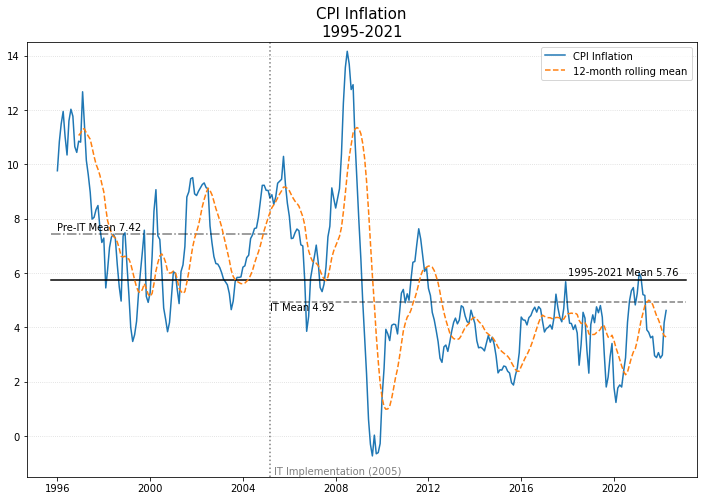

In [9]:
plt.figure(figsize=(12,8))
plt.title('CPI Inflation\n1995-2021', fontsize=15)
plt.plot(df_m.v_cpi, label='CPI Inflation')
plt.ylim([-1.5, 14.5]) 
plt.axhline(xmin=x0, xmax=x3, y=mean_all, color='k', linestyle='-')#, label='1995-2021 Mean {:.2f}'.format(np.mean(mean_all)))
plt.axhline(xmin=x0, xmax=x1, y=pre_mean, color='k', alpha = 0.5, linestyle='-.')#, label='Pre-IT Mean {:.2f}'.format(np.mean(pre_mean)))
plt.axhline(xmin=x2, xmax=x3, y=it_mean, color='k', alpha = 0.5, linestyle='--')#, label='IT Mean {:.2f}'.format(np.mean(it_mean)))
plt.axvline(pd.to_datetime('2005-03-01'), color='k', linestyle=':', alpha=0.5)
plt.plot(df_m.v_cpi.rolling(12).mean(),linestyle='--', label='12-month rolling mean')
plt.text(pd.to_datetime('2005-05-01'),-1.4, 'IT Implementation (2005)', fontsize=10, alpha=0.5)
plt.text(pd.to_datetime('1996-01-01'),pre_mean+0.15, 'Pre-IT Mean {:.2f}'.format(np.mean(pre_mean)), fontsize=10)
plt.text(pd.to_datetime('2005-03-01'),it_mean-0.3, 'IT Mean {:.2f}'.format(np.mean(it_mean)), fontsize=10)
plt.text(pd.to_datetime('2018-01-01'),mean_all+0.15, '1995-2021 Mean {:.2f}'.format(np.mean(mean_all)), fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()

In [10]:
# plt.figure(figsize=(12,8))
# sns.histplot(df_m.v_cpi, bins=20, color='k', alpha=0.5)
# plt.axvline(x=mean_all, color='r', linestyle='-')
# plt.axvline(x=median_all, color='g', linestyle='-')

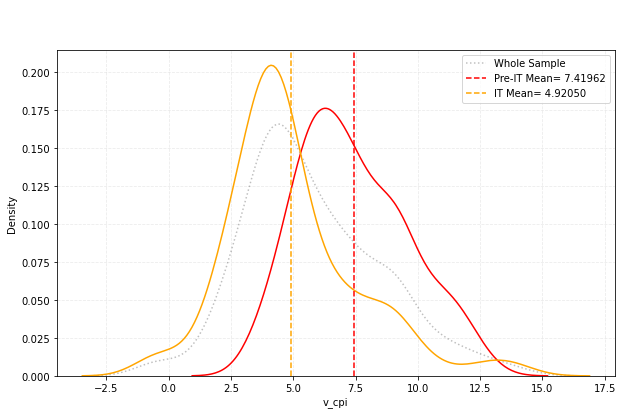

In [11]:
# Bootstrap Means histogram
plt.figure(figsize = (10, 6))
plt.suptitle('  ')
# sns.histplot(boot_means, bins=25, alpha=0.75)
sns.kdeplot(df_m.v_cpi, label='Whole Sample', color='k',linestyle = ':', alpha=0.25)
sns.kdeplot(pre_df.v_cpi, color='r')
sns.kdeplot(it_df.v_cpi, color='orange')
# plt.axvline(mean_all, color = 'k', linestyle = ':', label='Sample Mean= {:.5f}'.format(mean_all))
plt.axvline(pre_mean, color = 'r', linestyle = '--', label='Pre-IT Mean= {:.5f}'.format(pre_mean))
plt.axvline(it_mean, color = 'orange', linestyle = '--', label='IT Mean= {:.5f}'.format(it_mean))
plt.legend()
plt.grid(alpha = 0.25, linestyle = '--')
plt.show()

In [25]:
# Test de diferencia de medias
from scipy import stats
t_check=stats.ttest_ind(pre_df.v_cpi[12:].values.tolist(),it_df.v_cpi[12:].values.tolist())
t_check
alpha=0.05
if(t_check[1]<alpha):
    print('pre_mean different from it_mean')
    print(t_check)

pre_mean different from it_mean
Ttest_indResult(statistic=9.649352406576247, pvalue=2.3838902109458564e-19)


Inflation since 1947

In [59]:
inf1 = pd.read_csv('data/inflation.csv', delimiter=';')
inf1.index = pd.to_datetime(inf1.date, format='%d/%m/%Y')
inf1 = inf1.drop("date", axis = 1)
inf1['v_cpi'] = inf1['CPI'].pct_change(12)*100
inf1['vol_cpi1'] = inf1['CPI'].rolling(12).std()
inf1.dropna(inplace=True)
inf1.head()

,CPI,v_cpi,vol_cpi1
date,,,
1947-01-01,1.38,8.661417,0.042095
1947-02-01,1.41,11.023622,0.031079
1947-03-01,1.43,9.160305,0.026328
1947-04-01,1.40,4.477612,0.021794
1947-05-01,1.40,2.189781,0.020671


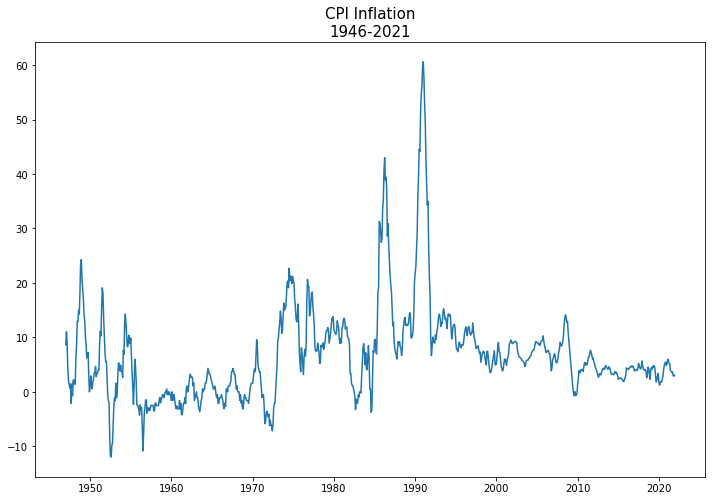

In [60]:
plt.figure(figsize=(12,8))
plt.title('CPI Inflation\n1946-2021', fontsize=15)
plt.plot(inf1.v_cpi, label='CPI Inflation')
# plt.plot(inf1.vol_cpi1,linestyle='--', label='12-month rolling mean')

In [61]:
simdf = inf1.loc['1988-01-01':'2021-12-01']
predf = simdf.loc['1988-01-01':'2004-12-01']
itdf  = simdf.loc['2005-01-01':'2021-12-01']


In [62]:
# inflation means
mean_all = simdf.v_cpi.mean()
vol_all = simdf.vol_cpi1.mean()
median_all = simdf.v_cpi.median()
pre_mean = predf.v_cpi.mean()
pre_vol = predf.vol_cpi1.mean()
it_mean = itdf.v_cpi.mean()
it_vol = itdf.vol_cpi1.mean()
print('1988 - 2021:', mean_all, vol_all)
print('1988 - 2004:', pre_mean, pre_vol)
print('2005 - 2021:', it_mean, it_vol)

1988 - 2021: 8.703021811347282 1.3162187279473123
1988 - 2004: 12.485583984792585 1.0477041323842118
2005 - 2021: 4.92045963790199 1.5847333235104137


In [64]:
# pd.to_datetime(df_m.index[20])
x0 = (simdf.index.get_loc('1988-01-01'))/len(simdf.index)
x1 = (simdf.index.get_loc('2004-12-01'))/len(simdf.index)
x2 = (simdf.index.get_loc('2005-01-01'))/len(simdf.index)
x3 = (simdf.index.get_loc('2021-12-01'))/len(simdf.index)

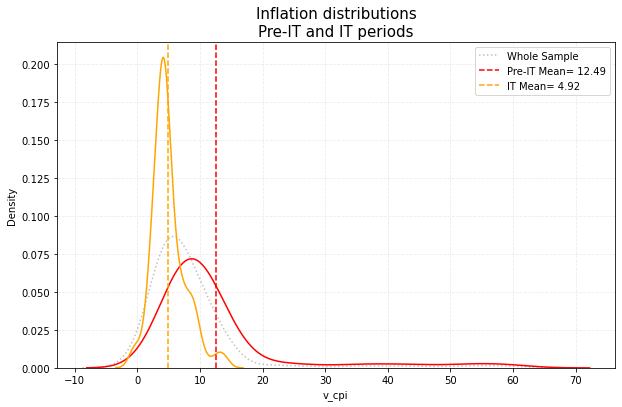

In [71]:
# histogram
plt.figure(figsize = (10, 6))
plt.title('Inflation distributions\nPre-IT and IT periods', fontsize=15)
sns.kdeplot(simdf.v_cpi, label='Whole Sample', color='k',linestyle = ':', alpha=0.25)
sns.kdeplot(predf.v_cpi, color='r')
sns.kdeplot(itdf.v_cpi, color='orange')
# plt.axvline(mean_all, color = 'k', linestyle = ':', label='Sample Mean= {:.5f}'.format(mean_all))
plt.axvline(pre_mean, color = 'r', linestyle = '--', label='Pre-IT Mean= {:.2f}'.format(pre_mean))
plt.axvline(it_mean, color = 'orange', linestyle = '--', label='IT Mean= {:.2f}'.format(it_mean))
plt.legend()
plt.grid(alpha = 0.25, linestyle = '--')
plt.show()

In [ ]:
# Test de diferencia de medias Inflacion
from scipy import stats
t_check=stats.ttest_ind(predf.v_cpi.values.tolist(),itdf.v_cpi.values.tolist())
t_check
alpha=0.05
if(t_check[1]<alpha):
    print('pre_mean different from it_mean')
    print(t_check)

pre_mean different from it_mean
Ttest_indResult(statistic=9.391266517634373, pvalue=4.3264081675581674e-19)


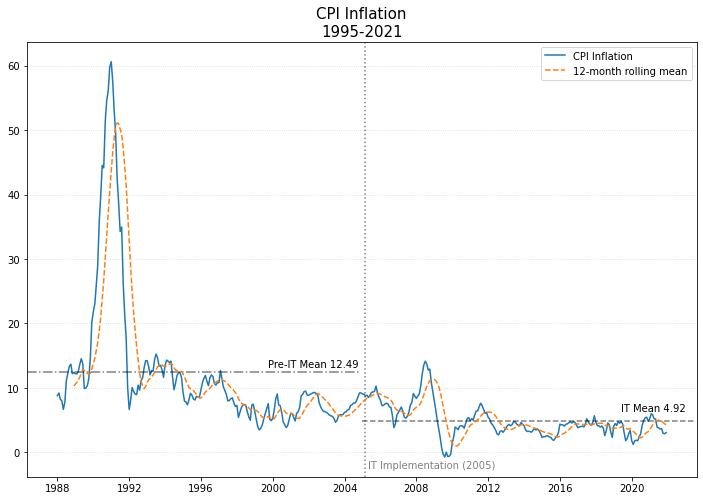

In [116]:
plt.figure(figsize=(12,8))
plt.title('CPI Inflation\n1995-2021', fontsize=15)
plt.plot(simdf.v_cpi, label='CPI Inflation')
# plt.ylim([-1.5, 25]) 
# plt.axhline(xmin=x0, xmax=x3, y=mean_all, color='k', linestyle='-')#, label='1995-2021 Mean {:.2f}'.format(np.mean(mean_all)))
plt.axhline(xmin=x0, xmax=x1, y=pre_mean, color='k', alpha = 0.5, linestyle='-.')#, label='Pre-IT Mean {:.2f}'.format(np.mean(pre_mean)))
plt.axhline(xmin=x2, xmax=x3, y=it_mean, color='k', alpha = 0.5, linestyle='--')#, label='IT Mean {:.2f}'.format(np.mean(it_mean)))
plt.axvline(pd.to_datetime('2005-03-01'), color='k', linestyle=':', alpha=0.5)
plt.plot(simdf.v_cpi.rolling(12).mean(),linestyle='--', label='12-month rolling mean')
plt.text(pd.to_datetime('2005-05-01'),-2.5, 'IT Implementation (2005)', fontsize=10, alpha=0.5)
plt.text(pd.to_datetime('1999-10-01'),pre_mean+0.75, 'Pre-IT Mean {:.2f}'.format(pre_mean), fontsize=10)
plt.text(pd.to_datetime('2019-06-01'),it_mean+1.5, 'IT Mean {:.2f}'.format(it_mean), fontsize=10)
# plt.text(pd.to_datetime('2018-01-01'),mean_all+0.15, '1995-2021 Mean {:.2f}'.format(np.mean(mean_all)), fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()

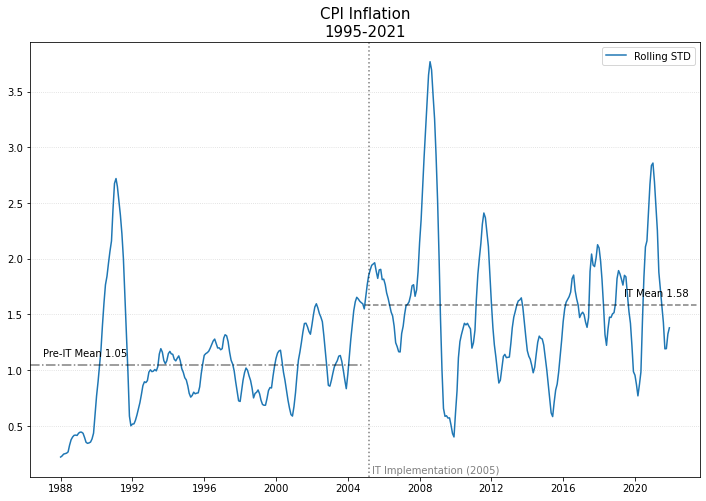

In [115]:
plt.figure(figsize=(12,8))
plt.title('CPI Inflation\n1995-2021', fontsize=15)
plt.plot(simdf.vol_cpi1, label='Rolling STD')
# plt.ylim([-1.5, 25]) 
# plt.axhline(xmin=x0, xmax=x3, y=mean_all, color='k', linestyle='-')#, label='1995-2021 Mean {:.2f}'.format(np.mean(mean_all)))
plt.axhline(xmin=x0, xmax=x1, y=pre_vol, color='k', alpha = 0.5, linestyle='-.')#, label='Pre-IT Mean {:.2f}'.format(np.mean(pre_mean)))
plt.axhline(xmin=x2, xmax=x3, y=it_vol, color='k', alpha = 0.5, linestyle='--')#, label='IT Mean {:.2f}'.format(np.mean(it_mean)))
plt.axvline(pd.to_datetime('2005-03-01'), color='k', linestyle=':', alpha=0.5)
# plt.plot(simdf.v_cpi.rolling(12).mean(),linestyle='--', label='12-month rolling mean')
plt.text(pd.to_datetime('2005-05-01'),0.075, 'IT Implementation (2005)', fontsize=10, alpha=0.5)
plt.text(pd.to_datetime('1987-01-01'),pre_vol+0.075, 'Pre-IT Mean {:.2f}'.format(pre_vol), fontsize=10)
plt.text(pd.to_datetime('2019-06-01'),it_vol+0.075, 'IT Mean {:.2f}'.format(it_vol), fontsize=10)
# plt.text(pd.to_datetime('2018-01-01'),mean_all+0.15, '1995-2021 Mean {:.2f}'.format(np.mean(mean_all)), fontsize=10)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()

In [114]:
# Test de diferencia de medias std
from scipy import stats
t_check=stats.ttest_ind(predf.vol_cpi1.values.tolist(),itdf.vol_cpi1.values.tolist())
t_check
alpha=0.05
if(t_check[1]<alpha):
    print('pre_mean different from it_mean')
    print(t_check)

pre_mean different from it_mean
Ttest_indResult(statistic=-10.013612021786763, pvalue=3.059001936736996e-21)


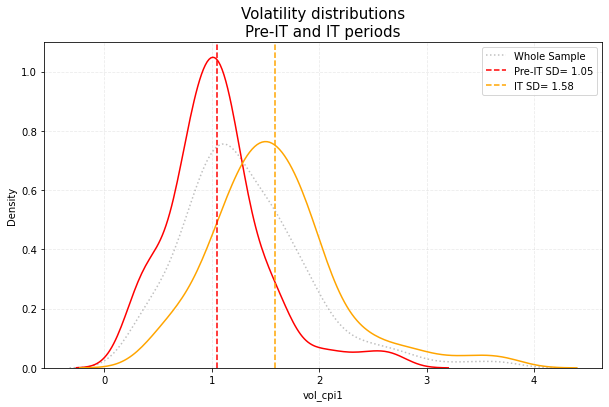

In [119]:
# histogram
plt.figure(figsize = (10, 6))
plt.title('Volatility distributions\nPre-IT and IT periods', fontsize=15)
sns.kdeplot(simdf.vol_cpi1, label='Whole Sample', color='k',linestyle = ':', alpha=0.25)
sns.kdeplot(predf.vol_cpi1, color='r')
sns.kdeplot(itdf.vol_cpi1, color='orange')
# plt.axvline(mean_all, color = 'k', linestyle = ':', label='Sample Mean= {:.5f}'.format(mean_all))
plt.axvline(pre_vol, color = 'r', linestyle = '--', label='Pre-IT SD= {:.2f}'.format(pre_vol))
plt.axvline(it_vol, color = 'orange', linestyle = '--', label='IT SD= {:.2f}'.format(it_vol))
plt.legend()
plt.grid(alpha = 0.25, linestyle = '--')
plt.show()